<a href="https://colab.research.google.com/github/Pspranoy/BigMart-Sales-Analysis-of-Product-and-Stores-Features/blob/main/FeatureEngPranoy_LoanDA_WithEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Libraries**

In [332]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
import matplotlib.pyplot as plt,seaborn as sns
drive.mount('/content/drive')
drive.mount('/content/drive')
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing data and creating Dataframe**

In [333]:
file_id = '1HBZazTIhPO2CizouGEWdpbuEf2F3Bvr8'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [334]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [336]:
df.shape

(113937, 81)

Removing unrequired variables

In [337]:
cols = pd.DataFrame(df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                                     precentage_missing_value
ListingKey                                               0.00
InvestmentFromFriendsAmount                              0.00
IncomeRange                                              0.00
IncomeVerifiable                                         0.00
StatedMonthlyIncome                                      0.00
LoanKey                                                  0.00
LoanCurrentDaysDelinquent                                0.00
LoanMonthsSinceOrigination                               0.00
LoanNumber                                               0.00
LoanOriginalAmount                                       0.00
LoanOriginationDate                                      0.00
LoanOriginationQuarter                                   0.00
OpenRevolvingMonthlyPayment                              0.00
MemberKey                                                0.00
LP_CustomerPayments                                      0.00
LP_Custo

**I will be dropping any features not relevant to loan acceptance target or the features with more than 50% missing values**

In [338]:
df_new = df[["InvestmentFromFriendsAmount","IncomeRange", "IncomeVerifiable", "StatedMonthlyIncome", "LoanCurrentDaysDelinquent", "LoanMonthsSinceOrigination", "LoanOriginalAmount","OpenRevolvingMonthlyPayment", "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss", "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments", "PercentFunded", "Recommendations", "InvestmentFromFriendsCount", "MonthlyLoanPayment", "OpenRevolvingAccounts", "Investors", "LoanStatus", "CurrentlyInGroup", "IsBorrowerHomeowner", "LenderYield", "ListingCategory (numeric)", "DateCreditPulled", "Term", "BorrowerRate", "BorrowerAPR", "CreditScoreRangeLower","CreditScoreRangeUpper", "PublicRecordsLast10Years", "InquiriesLast6Months", "FirstRecordedCreditLine", "TotalCreditLinespast7years","CurrentDelinquencies", "DelinquenciesLast7Years","TotalInquiries", "EmploymentStatus","Occupation","BorrowerState", "TradesNeverDelinquent (percentage)","TotalTrades", "AvailableBankcardCredit", "TradesOpenedLast6Months", 'CurrentCreditLines','RevolvingCreditBalance', 'OpenCreditLines', "PublicRecordsLast12Months", "BankcardUtilization", "AmountDelinquent","EmploymentStatusDuration", "DebtToIncomeRatio","EstimatedLoss", "CreditGrade"]].copy()

In [339]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   InvestmentFromFriendsAmount         113937 non-null  float64
 1   IncomeRange                         113937 non-null  object 
 2   IncomeVerifiable                    113937 non-null  bool   
 3   StatedMonthlyIncome                 113937 non-null  float64
 4   LoanCurrentDaysDelinquent           113937 non-null  int64  
 5   LoanMonthsSinceOrigination          113937 non-null  int64  
 6   LoanOriginalAmount                  113937 non-null  int64  
 7   OpenRevolvingMonthlyPayment         113937 non-null  float64
 8   LP_CustomerPayments                 113937 non-null  float64
 9   LP_CustomerPrincipalPayments        113937 non-null  float64
 10  LP_InterestandFees                  113937 non-null  float64
 11  LP_ServiceFees            

In [340]:
df_new.shape

(113937, 57)

# Checking the different values present in target column

In [341]:
df_new["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

# Converting Multi class data to binary class data

In [342]:
df_new['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

# Values considered for Defaulted status: LoanCurrentDaysDelinquent is more than 180
# Values Considered for Undefaulted status: LoanCurrentDaysDelinquent is less than 180

In [343]:
j=0
length=len(df_new['LoanStatus'])
for i in range(length):
  if df_new['LoanCurrentDaysDelinquent'][j] >= 180:
    df_new['LoanStatus'][j]='Defaulted'
  else:
    df_new['LoanStatus'][j]='Not_Defaulted'
  j+=1
df_new['LoanStatus'].unique()

<ipython-input-343-98ac231218d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LoanStatus'][j]='Not_Defaulted'
<ipython-input-343-98ac231218d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['LoanStatus'][j]='Defaulted'


array(['Not_Defaulted', 'Defaulted'], dtype=object)

In [344]:
df_new["LoanStatus"].value_counts()

Not_Defaulted    98841
Defaulted        15096
Name: LoanStatus, dtype: int64

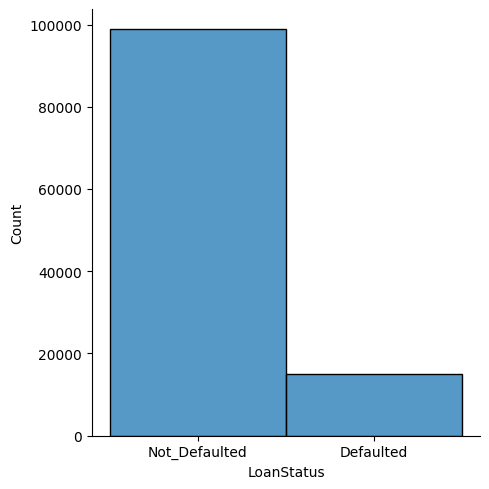

In [345]:
sns.displot(df_new["LoanStatus"])

# Handling missing values

In [346]:
df_new.describe()

,InvestmentFromFriendsAmount,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,OpenRevolvingMonthlyPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,MonthlyLoanPayment,OpenRevolvingAccounts,Investors,LenderYield,ListingCategory (numeric),Term,BorrowerRate,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,PublicRecordsLast10Years,InquiriesLast6Months,TotalCreditLinespast7years,CurrentDelinquencies,DelinquenciesLast7Years,TotalInquiries,TradesNeverDelinquent (percentage),TotalTrades,AvailableBankcardCredit,TradesOpenedLast6Months,CurrentCreditLines,RevolvingCreditBalance,OpenCreditLines,PublicRecordsLast12Months,BankcardUtilization,AmountDelinquent,EmploymentStatusDuration,DebtToIncomeRatio,EstimatedLoss
count,113937.000000,1.139370e+05,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113912.000000,113346.000000,113346.000000,113240.000000,113240.000000,113240.000000,113240.000000,112947.000000,112778.000000,106393.000000,106393.000000,106393.000000,106393.000000,106333.000000,1.063330e+05,106333.000000,106333.000000,106333.000000,106315.000000,106312.000000,105383.000000,84853.000000
mean,16.550751,5.608026e+03,152.816539,31.896882,8337.01385,398.292161,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,272.475783,6.96979,80.475228,0.182701,2.774209,40.830248,0.192764,0.218828,685.567731,704.567731,0.312646,1.435085,26.754539,0.592052,4.154984,5.584405,0.885897,23.230034,11210.225447,0.802327,10.317192,1.759871e+04,9.260164,0.015094,0.561309,984.507059,96.071582,0.275947,0.080306
std,294.545422,7.478497e+03,466.320254,29.974184,6245.80058,447.159711,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,192.697812,4.63097,103.239020,0.074516,3.996797,10.436212,0.074818,0.080364,66.458275,66.458275,0.727868,2.437507,13.637871,1.978707,10.160216,6.429946,0.148179,11.871311,19818.361309,1.097637,5.457866,3.293640e+04,5.022644,0.154092,0.317918,7158.270157,94.480605,0.551759,0.046764
min,0.000000,0.000000e+00,0.000000,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,0.00000,1.000000,-0.010000,0.000000,12.000000,0.000000,0.006530,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004900
25%,0.000000,3.200333e+03,0.000000,6.000000,4000.00000,114.000000,1005.760000,500.890000,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,131.620000,4.00000,2.000000,0.124200,1.000000,36.000000,0.134000,0.156290,660.000000,679.000000,0.000000,0.000000,17.000000,0.000000,0.000000,2.000000,0.820000,15.000000,880.000000,0.000000,7.000000,3.121000e+03,6.000000,0.000000,0.310000,0.000000,26.000000,0.140000,0.042400
50%,0.000000,4.666667e+03,0.000000,21.000000,6500.00000,271.000000,2583.830000,1587.500000,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,217.740000,6.00000,44.000000,0.173000,1.000000,36.000000,0.184000,0.209760,680.000000,699.000000,0.000000,1.000000,25.000000,0.000000,0.000000,4.000000,0.940000,22.000000,4100.000000,0.000000,10.000000,8.549000e+03,9.000000,0.000000,0.600000,0.000000,67.000000,0.220000,0.072400
75%,0.000000,6.825000e+03,0.000000,65.000000,12000.00000,525.000000,5548.400000,4000.000000,1458.540000,-13.920000

In [347]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   InvestmentFromFriendsAmount         113937 non-null  float64
 1   IncomeRange                         113937 non-null  object 
 2   IncomeVerifiable                    113937 non-null  bool   
 3   StatedMonthlyIncome                 113937 non-null  float64
 4   LoanCurrentDaysDelinquent           113937 non-null  int64  
 5   LoanMonthsSinceOrigination          113937 non-null  int64  
 6   LoanOriginalAmount                  113937 non-null  int64  
 7   OpenRevolvingMonthlyPayment         113937 non-null  float64
 8   LP_CustomerPayments                 113937 non-null  float64
 9   LP_CustomerPrincipalPayments        113937 non-null  float64
 10  LP_InterestandFees                  113937 non-null  float64
 11  LP_ServiceFees            

In [348]:
df_new.isnull().sum()

InvestmentFromFriendsAmount               0
IncomeRange                               0
IncomeVerifiable                          0
StatedMonthlyIncome                       0
LoanCurrentDaysDelinquent                 0
LoanMonthsSinceOrigination                0
LoanOriginalAmount                        0
OpenRevolvingMonthlyPayment               0
LP_CustomerPayments                       0
LP_CustomerPrincipalPayments              0
LP_InterestandFees                        0
LP_ServiceFees                            0
LP_CollectionFees                         0
LP_GrossPrincipalLoss                     0
LP_NetPrincipalLoss                       0
LP_NonPrincipalRecoverypayments           0
PercentFunded                             0
Recommendations                           0
InvestmentFromFriendsCount                0
MonthlyLoanPayment                        0
OpenRevolvingAccounts                     0
Investors                                 0
LoanStatus                      

# Null Value Types
**Numerical**: BorrowerAPR, CreditScoreRangeUpper, CreditScoreRangeLower, PublicRecordsLast10Years, InquiriesLast6Months, TotalCreditLinespast7years, CurrentDelinquencies, TotalInquiries, TradesNeverDelinquent (percentage), TotalTrades, AvailableBankcardCredit,
TradesOpenedLast6Months, CurrentCreditLines, RevolvingCreditBalance, OpenCreditLines, PublicRecordsLast12Months, BankcardUtilization, AmountDelinquent, EmploymentStatusDuration, DebtToIncomeRatio, EstimatedLoss, DelinquenciesLast7Years

**Categorical**: FirstRecordedCreditLine, EmploymentStatus, Occupation, BorrowerState

# Imputing Null values in numerical features with their median

In [349]:
df_new['BorrowerAPR'].fillna(df_new['BorrowerAPR'].median(), inplace=True)
df_new["CreditScoreRangeLower"].fillna(df_new["CreditScoreRangeLower"].median(), inplace=True)
df_new["CreditScoreRangeUpper"].fillna(df_new["CreditScoreRangeUpper"].median(), inplace=True)
df_new["PublicRecordsLast10Years"].fillna(df_new["PublicRecordsLast10Years"].median(), inplace=True)
df_new["InquiriesLast6Months"].fillna(df_new["InquiriesLast6Months"].median(), inplace=True)
df_new["TotalCreditLinespast7years"].fillna(df_new["TotalCreditLinespast7years"].median(), inplace=True)
df_new["CurrentDelinquencies"].fillna(df_new["CurrentDelinquencies"].median(), inplace=True)
df_new["TotalInquiries"].fillna(df_new["TotalInquiries"].median(), inplace=True)
df_new["TradesNeverDelinquent (percentage)"].fillna(df_new["TradesNeverDelinquent (percentage)"].median(), inplace=True)
df_new["TotalTrades"].fillna(df_new["TotalTrades"].median(), inplace=True)
df_new["AvailableBankcardCredit"].fillna(df_new["AvailableBankcardCredit"].median(), inplace=True)
df_new["TradesOpenedLast6Months"].fillna(df_new["TradesOpenedLast6Months"].median(), inplace=True)
df_new["CurrentCreditLines"].fillna(df_new["CurrentCreditLines"].median(), inplace=True)
df_new["RevolvingCreditBalance"].fillna(df_new["RevolvingCreditBalance"].median(), inplace=True)
df_new["OpenCreditLines"].fillna(df_new["OpenCreditLines"].median(), inplace=True)
df_new["PublicRecordsLast12Months"].fillna(df_new["PublicRecordsLast12Months"].median(), inplace=True)
df_new["BankcardUtilization"].fillna(df_new["BankcardUtilization"].median(), inplace=True)
df_new["AmountDelinquent"].fillna(df_new["AmountDelinquent"].median(), inplace=True)
df_new["EmploymentStatusDuration"].fillna(df_new["EmploymentStatusDuration"].median(), inplace=True)
df_new["DebtToIncomeRatio"].fillna(df_new["DebtToIncomeRatio"].median(), inplace=True)
df_new["EstimatedLoss"].fillna(df_new["EstimatedLoss"].median(), inplace=True)
df_new["DelinquenciesLast7Years"].fillna(df_new["DelinquenciesLast7Years"].median(), inplace=True)

In [350]:
df_new.isnull().sum()

InvestmentFromFriendsAmount               0
IncomeRange                               0
IncomeVerifiable                          0
StatedMonthlyIncome                       0
LoanCurrentDaysDelinquent                 0
LoanMonthsSinceOrigination                0
LoanOriginalAmount                        0
OpenRevolvingMonthlyPayment               0
LP_CustomerPayments                       0
LP_CustomerPrincipalPayments              0
LP_InterestandFees                        0
LP_ServiceFees                            0
LP_CollectionFees                         0
LP_GrossPrincipalLoss                     0
LP_NetPrincipalLoss                       0
LP_NonPrincipalRecoverypayments           0
PercentFunded                             0
Recommendations                           0
InvestmentFromFriendsCount                0
MonthlyLoanPayment                        0
OpenRevolvingAccounts                     0
Investors                                 0
LoanStatus                      

In [351]:
print(df['FirstRecordedCreditLine'].value_counts())
print('\n')
print(df['EmploymentStatus'].value_counts())
print('\n')
print(df['Occupation'].value_counts())
print('\n')
print(df['BorrowerState'].value_counts())

1993-12-01 00:00:00    185
1994-11-01 00:00:00    178
1995-11-01 00:00:00    168
1990-04-01 00:00:00    161
1995-03-01 00:00:00    159
                      ... 
1979-01-05 00:00:00      1
1978-09-11 00:00:00      1
1980-03-10 00:00:00      1
1981-07-18 00:00:00      1
2006-09-10 00:00:00      1
Name: FirstRecordedCreditLine, Length: 11585, dtype: int64


Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical               

# Imputing null values in categorical features with their mode

In [352]:
df_new['FirstRecordedCreditLine'].fillna(df_new['FirstRecordedCreditLine'].mode()[0], inplace=True)
df_new['EmploymentStatus'].fillna(df_new['EmploymentStatus'].mode()[0], inplace=True)
df_new['Occupation'].fillna(df_new['Occupation'].mode()[0], inplace=True)
df_new['BorrowerState'].fillna(df_new['BorrowerState'].mode()[0], inplace=True)

# Imputing null values in CreditGrade features with NoData

In [353]:
df_new['CreditGrade'].fillna(value='NoData',inplace=True)

# All null values removed

In [354]:
df_new.isnull().sum()

InvestmentFromFriendsAmount           0
IncomeRange                           0
IncomeVerifiable                      0
StatedMonthlyIncome                   0
LoanCurrentDaysDelinquent             0
LoanMonthsSinceOrigination            0
LoanOriginalAmount                    0
OpenRevolvingMonthlyPayment           0
LP_CustomerPayments                   0
LP_CustomerPrincipalPayments          0
LP_InterestandFees                    0
LP_ServiceFees                        0
LP_CollectionFees                     0
LP_GrossPrincipalLoss                 0
LP_NetPrincipalLoss                   0
LP_NonPrincipalRecoverypayments       0
PercentFunded                         0
Recommendations                       0
InvestmentFromFriendsCount            0
MonthlyLoanPayment                    0
OpenRevolvingAccounts                 0
Investors                             0
LoanStatus                            0
CurrentlyInGroup                      0
IsBorrowerHomeowner                   0


# ---------------------------------EDA Analysis Questions----------------------------------

Research Question 1 : **What are the most number of borrowers CreditGrade?**

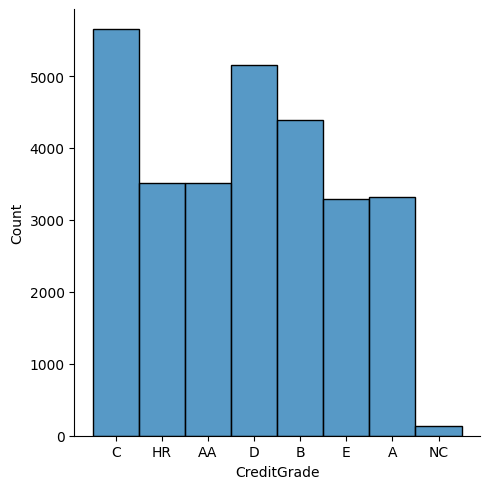

In [355]:
df_sub = df_new.query('CreditGrade!="NoData"')
sns.displot(df_sub['CreditGrade'])

**Answer**: Ignorning the entries where there is no creditgrade available, most common credit grade is D followed by C and B

:Research Question 2 : **Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?**

I will compare the count of number of defaulted and undefaulted loans under each category of CreditGrade and see if there is any relation between lower creditgrades and default counts

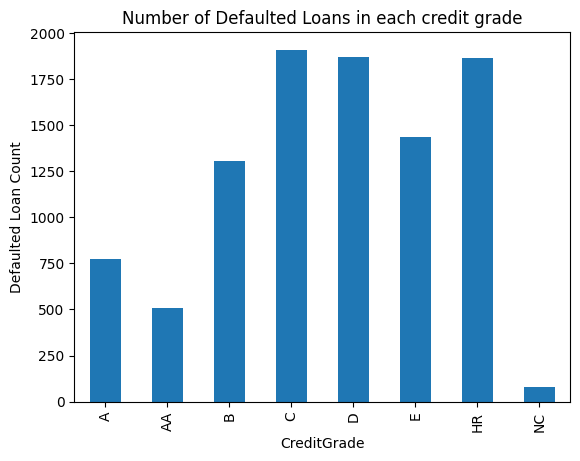

In [356]:
ax = df_new.query('CreditGrade != "NoData"').query('LoanStatus == "Defaulted"').groupby('CreditGrade')['LoanStatus'].count().plot(kind='bar',title='Number of Defaulted Loans in each credit grade')
ax.set_ylabel('Defaulted Loan Count')
plt.show()

**Answer**: We can see the highest number of defaults are present in C and D credit grades so we can conclude that a lower creditgrade leads to more chances of defeault

:Research Question 3 : **What is the highest number of BorrowerRate?**

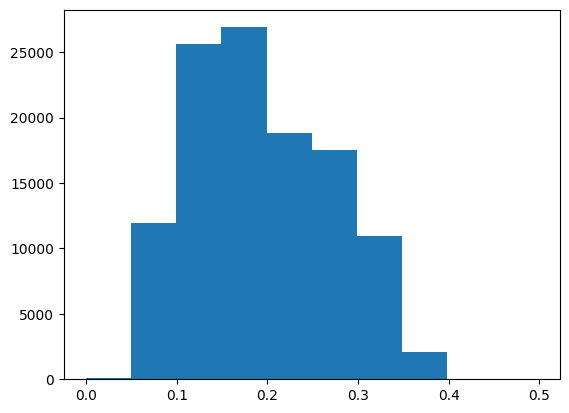

In [357]:
plt.hist(df_new['BorrowerRate'])
plt.show()

**Answer**: Highest number of borrower rates are observed between 0.1 and 0.2

Research Question 4 : **Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?**

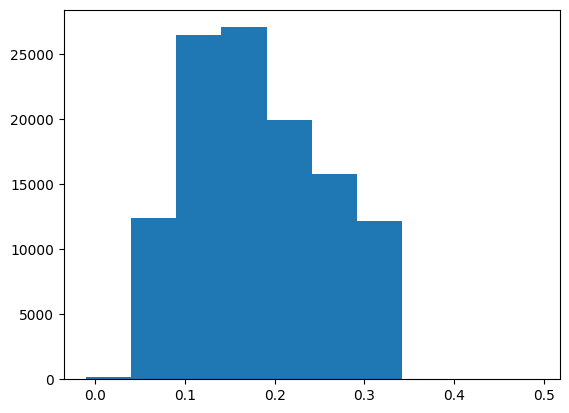

In [358]:
plt.hist(df_new['LenderYield'])
plt.show()

**Answer**: Yes highest Lender Yield is observed between 0.1 and 0.2

Research Question 5 : **Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B**

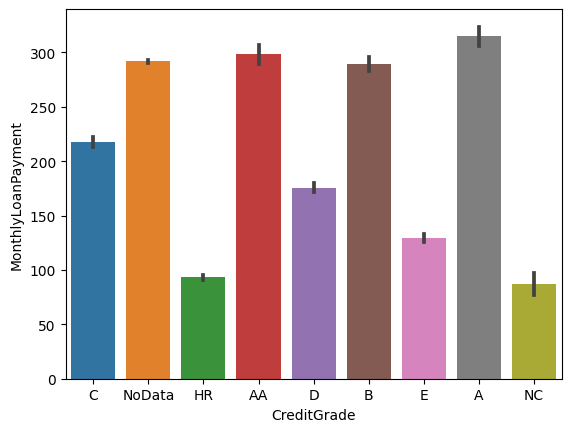

In [359]:
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data = df_new)
plt.show()

**Answer**: Yes the highest monthly loan payments are observed for credit grades AA,A and B

Research Question 6 : **Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.**

In [360]:
#Preparing data seperately for this question as i have already replaced data for LoanStatus feature
dftemp = df[['LoanStatus','CreditGrade']].copy()
dftemp['CreditGrade'].fillna(value='NoData',inplace=True)
#I have not replaced null values of creditgrade with mode and 75% of the values are null and this will create bias in data

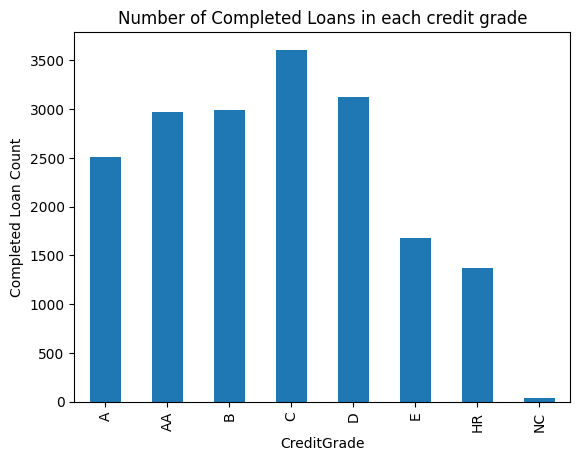

In [361]:
ax = df.query('CreditGrade != "NoData"').query('LoanStatus == "Completed"').groupby('CreditGrade')['LoanStatus'].count().plot(kind='bar',title='Number of Completed Loans in each credit grade')
ax.set_ylabel('Completed Loan Count')
plt.show()

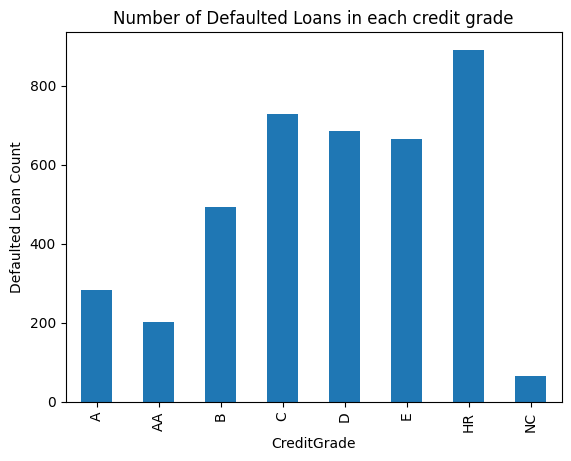

In [362]:
ax = df.query('CreditGrade != "NoData"').query('LoanStatus == "Defaulted"').groupby('CreditGrade')['LoanStatus'].count().plot(kind='bar',title='Number of Defaulted Loans in each credit grade')
ax.set_ylabel('Defaulted Loan Count')
plt.show()

**Answer**: As we can see least number of defaulted loans are in AA,A and B credit grades and highest number of completed loans are between AA to C hence, credit grade is accurate

Research Question 7 : **Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness. Now we need to understand does the
ProsperScore, the custom built risk assesment system is being used
in determing borrower’s rate?**

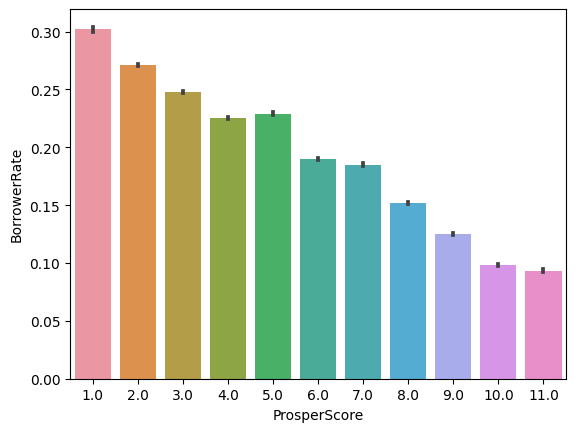

In [363]:
dfsub2 = df[['ProsperScore', 'BorrowerRate', 'BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper']].copy()
dfsub2.isnull().sum()
#imputing null values in ProsperScore, CreditScoreRangeLower, CreditScoreRangeUpper
dfsub2['ProsperScore'].fillna(dfsub2['ProsperScore'].median(), inplace=True)
dfsub2['BorrowerAPR'].fillna(dfsub2['BorrowerAPR'].median(), inplace=True)
dfsub2["CreditScoreRangeLower"].fillna(dfsub2["CreditScoreRangeLower"].median(), inplace=True)
dfsub2["CreditScoreRangeUpper"].fillna(dfsub2["CreditScoreRangeUpper"].median(), inplace=True)
sns.barplot(x='ProsperScore', y='BorrowerRate', data = dfsub2)
plt.show()

**Answer**: There is a clear trend here where a high Prosper Score leads to a lower Borrower rate

Research Question 8: **From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness**

In [364]:
#Preparing Creditscore values from upper and lower limits
dfsub2['CreditScore'] = (dfsub2['CreditScoreRangeLower'] + dfsub2['CreditScoreRangeUpper'])/2
dfsub2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ProsperScore           113937 non-null  float64
 1   BorrowerRate           113937 non-null  float64
 2   BorrowerAPR            113937 non-null  float64
 3   CreditScoreRangeLower  113937 non-null  float64
 4   CreditScoreRangeUpper  113937 non-null  float64
 5   CreditScore            113937 non-null  float64
dtypes: float64(6)
memory usage: 5.2 MB


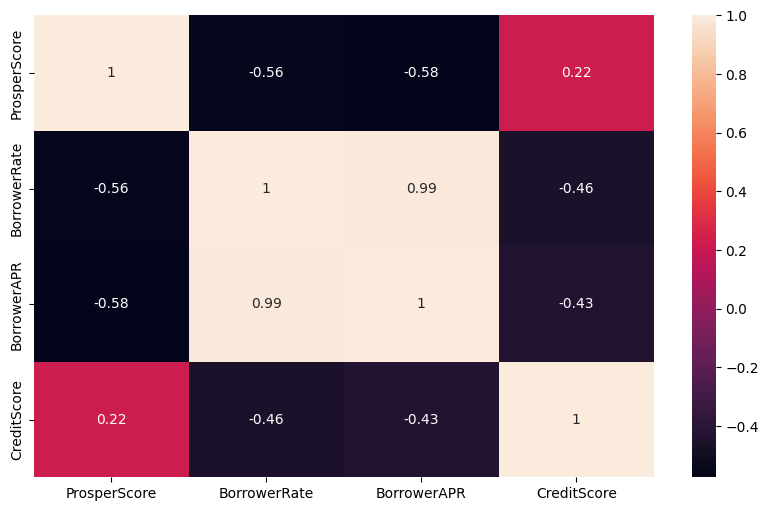

In [365]:
corr= dfsub2[['ProsperScore', 'BorrowerRate', 'BorrowerAPR', 'CreditScore']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, annot_kws={'size': 10})
plt.show()

**Answer**: As expected we see a high negative correlation between creditscores and borrower rate and borrower APR. Similarly, there is a high correlation between ProsperScore and BorrowerRate and BorrowerAPR. This indicates that a higher creditscore or Prosperscore leads to a lower borrowerrate

#----------------------------------- Encoding the Data-------------------------------------

In [366]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   InvestmentFromFriendsAmount         113937 non-null  float64
 1   IncomeRange                         113937 non-null  object 
 2   IncomeVerifiable                    113937 non-null  bool   
 3   StatedMonthlyIncome                 113937 non-null  float64
 4   LoanCurrentDaysDelinquent           113937 non-null  int64  
 5   LoanMonthsSinceOrigination          113937 non-null  int64  
 6   LoanOriginalAmount                  113937 non-null  int64  
 7   OpenRevolvingMonthlyPayment         113937 non-null  float64
 8   LP_CustomerPayments                 113937 non-null  float64
 9   LP_CustomerPrincipalPayments        113937 non-null  float64
 10  LP_InterestandFees                  113937 non-null  float64
 11  LP_ServiceFees            

# Categorical features are:
IncomeRange, DateCreditPulled, FirstRecordedCreditLine, EmploymentStatus, Occupation, BorrowerState

In [367]:
cols_encode = ["IncomeRange", "DateCreditPulled","FirstRecordedCreditLine", "EmploymentStatus", "Occupation", "BorrowerState", "CreditGrade", "LoanStatus"]
label_encoders = {}
for columns in cols_encode:
    label_encoders= LabelEncoder()
    df_new[columns] = label_encoders.fit_transform(df_new[columns])

# Boolean features are
IncomeVerifiable, CurrentlyInGroup, IsBorrowerHomeowner

In [368]:
df_new["IsBorrowerHomeowner"] = df_new["IsBorrowerHomeowner"].replace({True: 1, False: 0})
df_new["CurrentlyInGroup"] = df_new["CurrentlyInGroup"].replace({True: 1, False: 0})
df_new["IncomeVerifiable"] = df_new["IncomeVerifiable"].replace({True: 1, False: 0})

In [369]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   InvestmentFromFriendsAmount         113937 non-null  float64
 1   IncomeRange                         113937 non-null  int64  
 2   IncomeVerifiable                    113937 non-null  int64  
 3   StatedMonthlyIncome                 113937 non-null  float64
 4   LoanCurrentDaysDelinquent           113937 non-null  int64  
 5   LoanMonthsSinceOrigination          113937 non-null  int64  
 6   LoanOriginalAmount                  113937 non-null  int64  
 7   OpenRevolvingMonthlyPayment         113937 non-null  float64
 8   LP_CustomerPayments                 113937 non-null  float64
 9   LP_CustomerPrincipalPayments        113937 non-null  float64
 10  LP_InterestandFees                  113937 non-null  float64
 11  LP_ServiceFees            

In [370]:
df_new.head()

,InvestmentFromFriendsAmount,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,OpenRevolvingMonthlyPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,MonthlyLoanPayment,OpenRevolvingAccounts,Investors,LoanStatus,CurrentlyInGroup,IsBorrowerHomeowner,LenderYield,ListingCategory (numeric),DateCreditPulled,Term,BorrowerRate,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,PublicRecordsLast10Years,InquiriesLast6Months,FirstRecordedCreditLine,TotalCreditLinespast7years,CurrentDelinquencies,DelinquenciesLast7Years,TotalInquiries,EmploymentStatus,Occupation,BorrowerState,TradesNeverDelinquent (percentage),TotalTrades,AvailableBankcardCredit,TradesOpenedLast6Months,CurrentCreditLines,RevolvingCreditBalance,OpenCreditLines,PublicRecordsLast12Months,BankcardUtilization,AmountDelinquent,EmploymentStatusDuration,DebtToIncomeRatio,EstimatedLoss,CreditGrade
0,0.0,3,1,3083.333333,0,78,9425,24.0,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,330.43,1,258,1,1,1,0.1380,0,14346,36,0.1580,0.16516,640.0,659.0,0.0,3.0,8637,12.0,2.0,4.0,3.0,7,35,5,0.81,11.0,1500.0,0.0,5.0,0.0,4.0,0.0,0.00,472.0,2.0,0.17,0.0724,3
1,0.0,4,1,6125.000000,0,0,10000,389.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,318.93,13,1,1,0,0,0.0820,2,111882,36,0.0920,0.12016,680.0,699.0,1.0,3.0,6615,29.0,0.0,0.0,5.0,0,41,5,1.00,29.0,10266.0,2.0,14.0,3989.0,14.0,0.0,0.21,0.0,44.0,0.18,0.0249,8
2,0.0,6,1,2083.333333,0,86,3001,0.0,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,123.32,0,41,1,1,0,0.2400,0,6445,36,0.2750,0.28269,480.0,499.0,0.0,0.0,8925,3.0,1.0,0.0,1.0,2,35,10,0.94,22.0,4100.0,0.0,10.0,8549.0,9.0,0.0,0.60,0.0,67.0,0.06,0.0724,6
3,0.0,3,1,2875.000000,0,16,10000,115.0,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,321.45,7,158,1,0,1,0.0874,16,64723,36,0.0974,0.12528,800.0,819.0,0.0,0.0,2245,29.0,4.0,14.0,1.0,0,50,10,0.76,26.0,30754.0,0.0,5.0,1444.0,5.0,0.0,0.04,10056.0,113.0,0.15,0.0249,8
4,0.0,2,1,9583.333333,0,6,15000,220.0,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,563.97,6,20,1,0,1,0.1985,2,85856,36,0.2085,0.24614,680.0,699.0,0.0,1.0,9496,49.0,0.0,0.0,9.0,0,19,23,0.95,39.0,695.0,2.0,19.0,6193.0,19.0,0.0,0.81,0.0,44.0,0.26,0.0925,8


# ======================Feature Engineering==============================

**Feature Extraction to implement new features**

In [371]:
correlations = df_new.corr()
target_correlations = correlations['LoanStatus'].sort_values(ascending=False)
print("Correlation of features with the target column:")
for feature, correlation in target_correlations.iteritems():
    print(f"{feature}: {correlation}")

Correlation of features with the target column:
LoanStatus: 1.0
DateCreditPulled: 0.37213703026671396
CreditGrade: 0.26169874261529535
CreditScoreRangeUpper: 0.2605638488408973
CreditScoreRangeLower: 0.2605638488408973
LP_CollectionFees: 0.17660183283779682
TradesNeverDelinquent (percentage): 0.14506942143092003
LP_CustomerPrincipalPayments: 0.1293687817859778
Term: 0.12741788751619842
OpenRevolvingAccounts: 0.11656742780097419
LoanOriginalAmount: 0.1162175689648108
LP_CustomerPayments: 0.10746266069548327
OpenCreditLines: 0.0863157166028655
AvailableBankcardCredit: 0.0853146705004688
EmploymentStatusDuration: 0.07364044001642807
CurrentCreditLines: 0.07119017198078585
OpenRevolvingMonthlyPayment: 0.06994826280310656
MonthlyLoanPayment: 0.06965002098357671
ListingCategory (numeric): 0.06795571145738846
TotalTrades: 0.06716831652829967
StatedMonthlyIncome: 0.05903543652150455
BorrowerState: 0.0564198641242012
TotalCreditLinespast7years: 0.05048923217525198
IsBorrowerHomeowner: 0.0447108

<ipython-input-371-324f11725968>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, correlation in target_correlations.iteritems():


 **Highest correlated features are:**DateCreditPulled, CreditGrade, CreditScoreRangeUpper, CreditScoreRangeLower, LP_CollectionFees, TradesNeverDelinquent (percentage), LP_CustomerPrincipalPayments, Term, OpenRevolvingAccounts

**New Features**

In [372]:
#Attempting a new feature Delinquency Ratio
df_new['DelinquencyRatio'] = df_new['DelinquenciesLast7Years']/df_new['TotalCreditLinespast7years']

In [373]:
print(df_new['DelinquencyRatio'].corr(df_new['LoanStatus']))

-0.09758445924787923


Delinquency Ratio has a higher correlation than both DelinquenciesLast7Years and TotalCreditLinespast7years

In [374]:
#Attempting a new feature IncomeBasedCreditScore
df_new['IncomeBasedCreditScore'] = df_new['IncomeRange'].astype(str) +"-"+ df_new["CreditGrade"].astype(str)
df_new['IncomeBasedCreditScore'].unique()

array(['3-3', '4-8', '6-6', '3-8', '2-8', '5-8', '1-3', '6-1', '3-4',
       '1-8', '6-2', '4-4', '6-4', '7-4', '3-5', '6-5', '0-0', '7-8',
       '5-5', '0-3', '4-6', '5-3', '3-0', '5-2', '6-0', '3-1', '3-6',
       '1-0', '3-2', '4-2', '2-2', '4-3', '6-3', '2-1', '1-4', '4-0',
       '2-0', '1-2', '1-5', '4-1', '5-0', '4-5', '2-3', '5-1', '1-1',
       '1-6', '0-1', '6-7', '5-4', '7-0', '2-5', '0-6', '7-6', '2-6',
       '2-4', '0-5', '0-2', '7-1', '0-4', '0-8', '7-5', '5-6', '7-2',
       '7-3'], dtype=object)

In [375]:
#Encoding values in the new feature
df_new['IncomeBasedCreditScore'] = label_encoders.fit_transform(df_new['IncomeBasedCreditScore'])

In [376]:
#Calculating correlation for the new feature
print(df_new['IncomeBasedCreditScore'].corr(df_new['LoanStatus']))

0.006934679292922359


**Feature Selection**

**Using Mutual Information Selection to determine most relevant features**

In [377]:
target_column = 'LoanStatus'
x = df_new.drop(columns=[target_column])
y = df_new[target_column]
mi = mutual_info_regression
mi_scores = mi(x, y)
mi_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

In [378]:
print(mi_df.sort_values(by=['MI Score'], ascending=False))

                               Feature  MI Score
4            LoanCurrentDaysDelinquent  0.389619
14                 LP_NetPrincipalLoss  0.339594
13               LP_GrossPrincipalLoss  0.338011
29                         BorrowerAPR  0.098205
5           LoanMonthsSinceOrigination  0.091694
26                    DateCreditPulled  0.091391
9         LP_CustomerPrincipalPayments  0.085702
54                       EstimatedLoss  0.085616
24                         LenderYield  0.081772
28                        BorrowerRate  0.080968
57              IncomeBasedCreditScore  0.066805
19                  MonthlyLoanPayment  0.065674
55                         CreditGrade  0.061015
8                  LP_CustomerPayments  0.053205
39                    EmploymentStatus  0.043667
15     LP_NonPrincipalRecoverypayments  0.040998
12                   LP_CollectionFees  0.039094
31               CreditScoreRangeUpper  0.036661
30               CreditScoreRangeLower  0.035732
25           Listing

# Using filter method (Variance Threshold) for feature selection to remove low variance features

In [379]:
variance_selector = VarianceThreshold(threshold=0.001)
X_filtered = variance_selector.fit(x)
a = X_filtered.get_support()
b=x.columns
dict_var = {'Columns':x.columns, 'Feature_Retained':a}
df_var = pd.DataFrame(dict_var)
df_var
#All features with a variance of 0.2 or less are eliminated

,Columns,Feature_Retained
0,InvestmentFromFriendsAmount,True
1,IncomeRange,True
2,IncomeVerifiable,True
3,StatedMonthlyIncome,True
4,LoanCurrentDaysDelinquent,True
5,LoanMonthsSinceOrigination,True
6,LoanOriginalAmount,True
7,OpenRevolvingMonthlyPayment,True
8,LP_CustomerPayments,True
9,LP_CustomerPrincipalPayments,True


PercentFunded feature can be eliminated

**Using Principal component analysis**

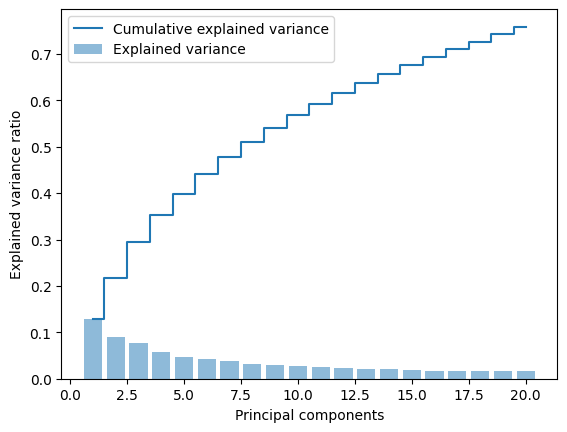

In [381]:
# Standardizing the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_new)

# Performing PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(scaled_df)


# Creating a new dataframe from PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11','PC12', 'PC13', 'PC14', 'PC15','PC16', 'PC17', 'PC18', 'PC2','PC19'])

# Explained variance ratio
explained_var = pca.explained_variance_ratio_

# Plotting the explained variance
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.5, align='center',
        label='Explained variance')
plt.step(range(1, len(explained_var) + 1), np.cumsum(explained_var), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [382]:
# Printing the PCA dataframe and explained variance ratio
print("PCA DataFrame:")
print(pca_df)
print("\nExplained Variance Ratio:")
print(explained_var)

PCA DataFrame:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.602989  4.306439 -3.080533  0.605427 -1.387506  1.243966  0.242813   
1       1.977019 -1.662787 -0.191110 -2.822000 -0.071445 -0.507653 -0.443217   
2      -4.262047  0.684049 -0.311591 -0.601112 -1.906744  1.911525 -3.589987   
3       1.954869  0.249619 -2.816801 -0.285429 -1.071995 -2.624610  2.478446   
4       1.942819 -1.287906  2.124695  0.704041  0.292944  0.125578  0.194088   
...          ...       ...       ...       ...       ...       ...       ...   
113932  0.990531 -1.234816  0.722179  0.348236 -0.939674 -1.132643 -0.099190   
113933  1.467991 -0.963780  0.255548 -2.465712 -1.489488 -0.201663 -0.573295   
113934  1.255028 -2.403562  0.399552  0.347120  1.112813  0.083181 -0.522975   
113935  1.684491  3.152840  0.035085  6.228998 -1.393552 -0.079431 -0.860794   
113936  0.650428 -2.518985 -0.453507 -2.448155 -0.914623 -1.087882  0.134743   

             PC8       P